<a href="https://colab.research.google.com/github/taeyoni/today-I-learned/blob/main/python04(%EB%B2%94%EC%A3%BC%ED%98%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

2.1.4
1.26.4
0.13.1


In [8]:
df = sns.load_dataset("mpg")
df.shape

(398, 9)

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [10]:
df.tail(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [12]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [13]:
#기술통계값 범주형 변수만
df.describe(include="object")
#top:최빈

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [14]:
#범주형 변수 찾기
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


<Axes: xlabel='origin', ylabel='count'>

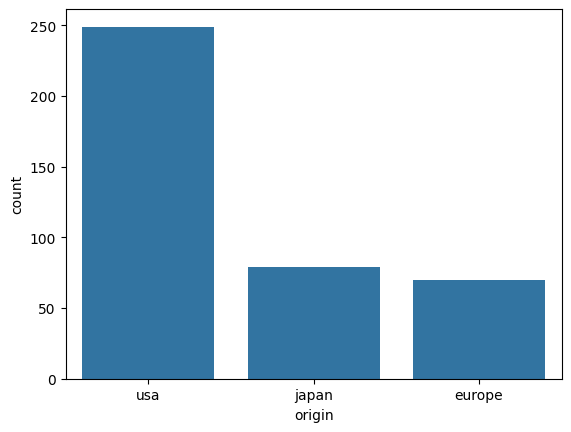

In [15]:
#origin 빈도수 시각화
#y축 지정할 필요 없음(counterplot)
sns.countplot(data=df, x="origin")

<Axes: xlabel='origin', ylabel='count'>

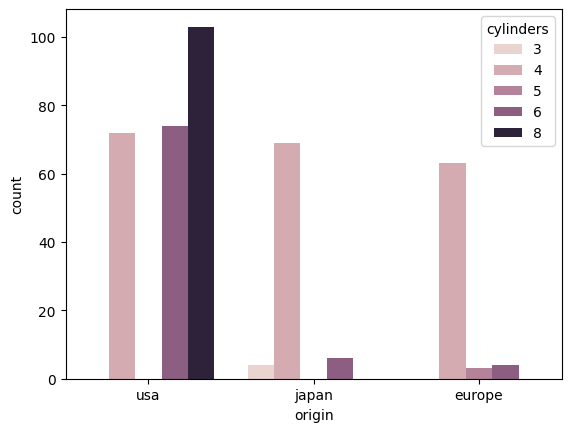

In [17]:
sns.countplot(data=df, x="origin", hue="cylinders")

<Axes: xlabel='cylinders', ylabel='count'>

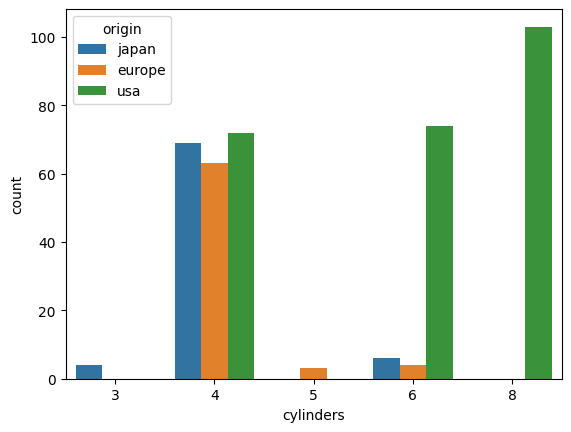

In [19]:
sns.countplot(data=df, x="cylinders", hue="origin")

In [16]:
df["origin"].value_counts()

,count
origin,
usa,249
japan,79
europe,70


In [21]:
#pd.crosstab으로 시각화한 값 직접 구하기
pd.crosstab(df["origin"], df["cylinders"])


cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


In [22]:
#범주형, 수치형 함께 비교

<ipython-input-27-53d78d26dc97>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="origin", y="mpg", estimator=np.mean, ci=95)


<Axes: xlabel='origin', ylabel='mpg'>

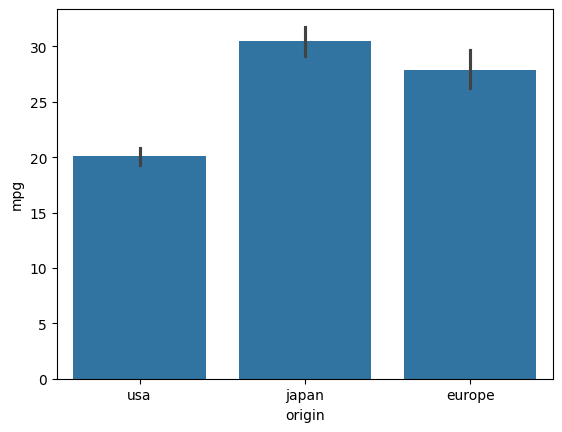

In [27]:
#barplot으로 origin 별 mpg 값 구하기
sns.barplot(data=df, x="origin", y="mpg", estimator=np.mean, ci=95)

In [31]:
#groupby   origin 별로 그룹화하고 mpg의 평균 구하기
df.groupby("origin")["mpg"].mean()

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


In [32]:
#pivot_table 로 같은 값 구하기
#평균값 지정 안해도 그렇게 돼잇음.
pd.pivot_table(data=df, index="origin", values="mpg")

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


<ipython-input-33-9c203d1b671d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="origin", y="mpg", estimator=np.sum, ci=None)


<Axes: xlabel='origin', ylabel='mpg'>

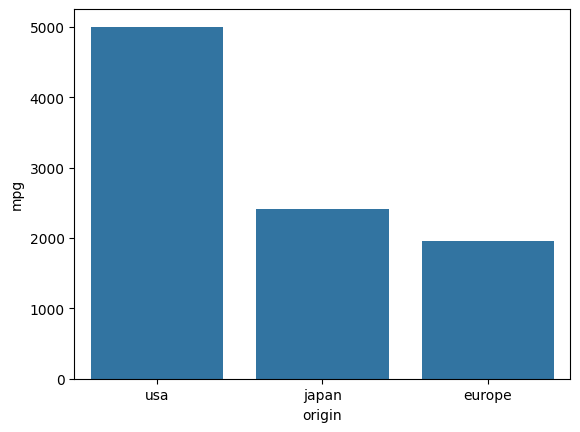

In [33]:
#barplot으로 합계 값 구하기
sns.barplot(data=df, x="origin", y="mpg", estimator=np.sum, ci=None)

<ipython-input-35-2a96744aed1f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="cylinders", y="mpg", estimator=np.sum, ci=None, hue="origin")


<Axes: xlabel='cylinders', ylabel='mpg'>

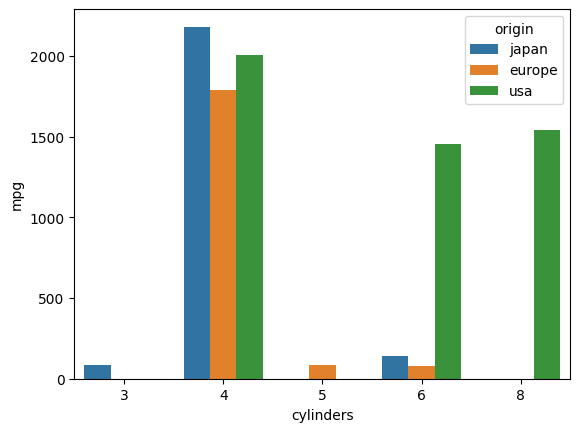

In [35]:
sns.barplot(data=df, x="cylinders", y="mpg", estimator=np.sum, ci=None, hue="origin")

In [36]:
#groupby를 통해 시각화에 대한 값 구하기
df.groupby(["cylinders", "origin"])["mpg"].mean().unstack()

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


In [37]:
 #pivot_table 를 통해 위 시각화에 대한 값 구하기
 pd.pivot_table(data=df, index="cylinders", columns="origin", values="mpg")


origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


<ipython-input-39-7fed9f4ab4cf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="origin", y="mpg", hue="cylinders", ci=None)


<Axes: xlabel='origin', ylabel='mpg'>

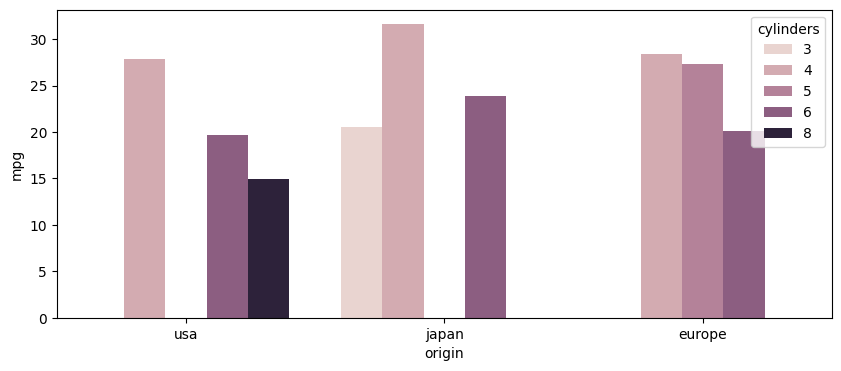

In [39]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="origin", y="mpg", hue="cylinders", ci=None)

<Axes: xlabel='origin', ylabel='mpg'>

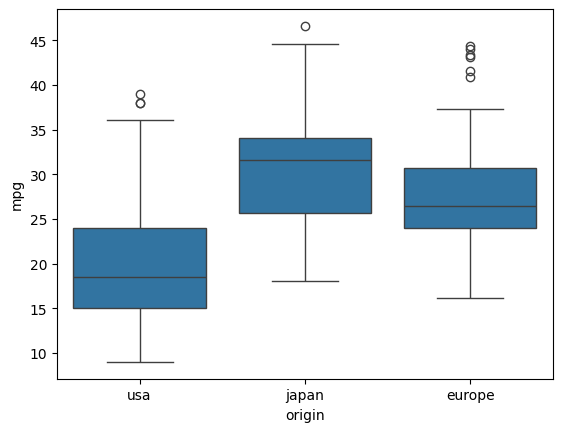

In [40]:
#boxplot으로 origin 별 mpg의 기술통계 값 구하기
sns.boxplot(data=df, x="origin", y="mpg")

In [44]:
 origin_desc = df.groupby("origin")["mpg"].describe()

In [45]:
europe = origin_desc.loc["europe"]
europe

,europe
count,70.000000
mean,27.891429
std,6.723930
min,16.200000
25%,24.000000
50%,26.500000
75%,30.650000
max,44.300000


In [46]:
Q3 = europe["75%"]
Q3

30.65

In [47]:
Q1 = europe["25%"]
Q1

24.0

In [48]:
IQR = Q3 - Q1
IQR

6.649999999999999

In [49]:
OUT_MAX = Q3 + (IQR * 1.5)
OUT_MAX

40.625

In [50]:
OUT_MIN = Q1 - (IQR * 1.5)
OUT_MIN

14.025000000000002

<Axes: xlabel='origin', ylabel='mpg'>

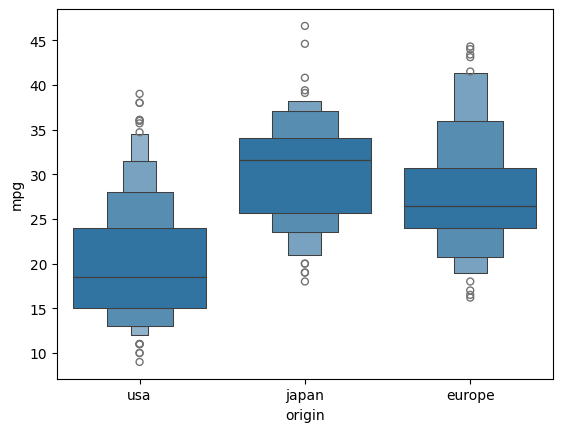

In [51]:
 sns.boxenplot(data=df, x="origin", y="mpg")

<Axes: xlabel='origin', ylabel='mpg'>

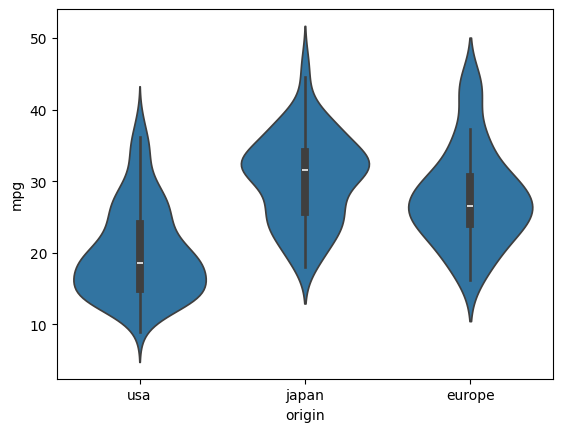

In [52]:
sns.violinplot(data=df, x="origin", y="mpg")

In [53]:
#산점도를 통한 범주형 데이터 표현

<Axes: xlabel='origin', ylabel='mpg'>

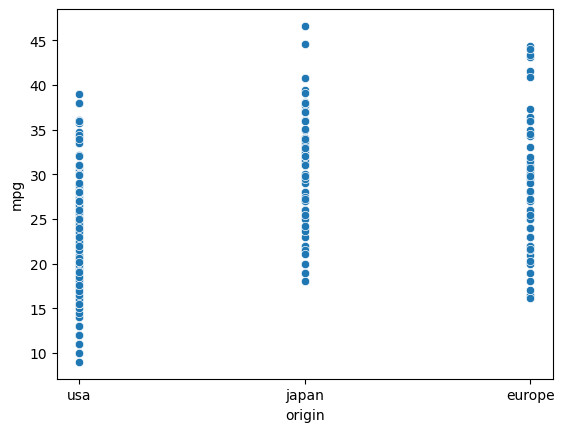

In [54]:
sns.scatterplot(data=df, x="origin", y="mpg")

<Axes: xlabel='origin', ylabel='mpg'>

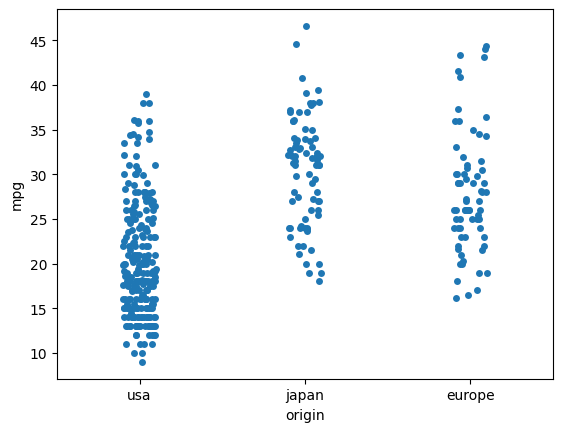

In [55]:
sns.stripplot(data=df, x="origin", y="mpg")

<Axes: xlabel='origin', ylabel='mpg'>

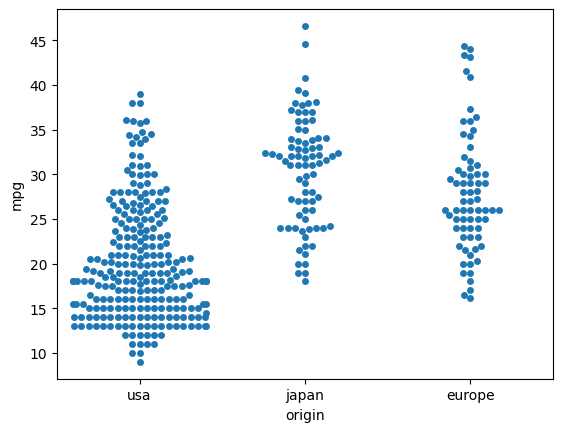

In [58]:
#범주형 데이터는 strip 보다는 swarmlpot
sns.swarmplot(data=df, x="origin", y="mpg")

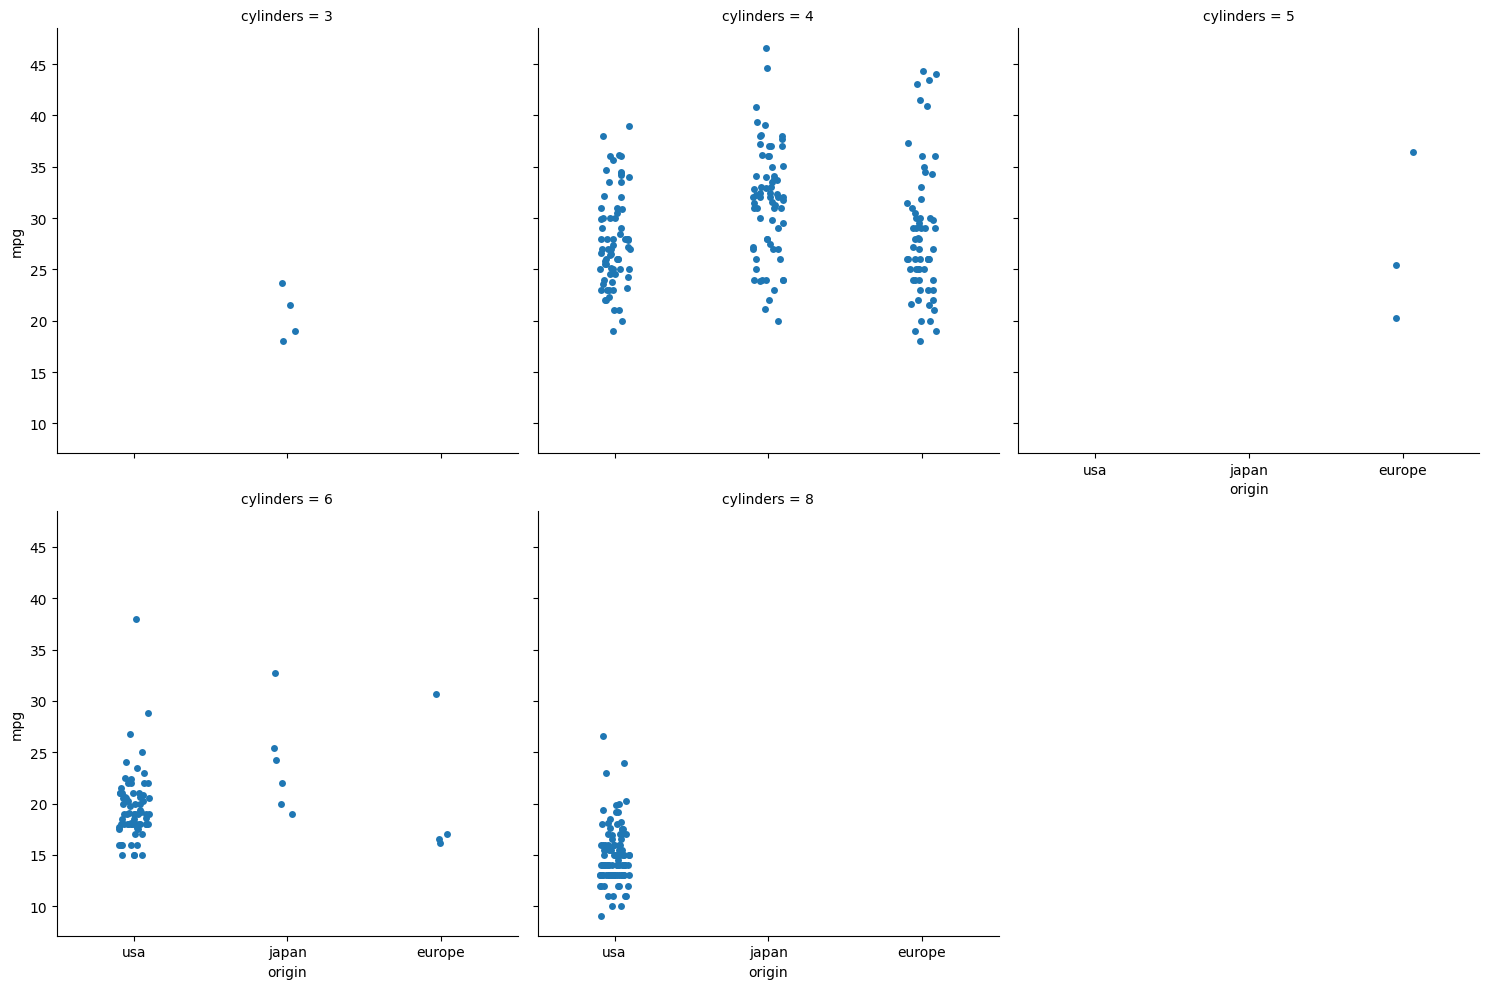

In [62]:
#catplot.  col을 통해 서브 플랏 그림
sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3)

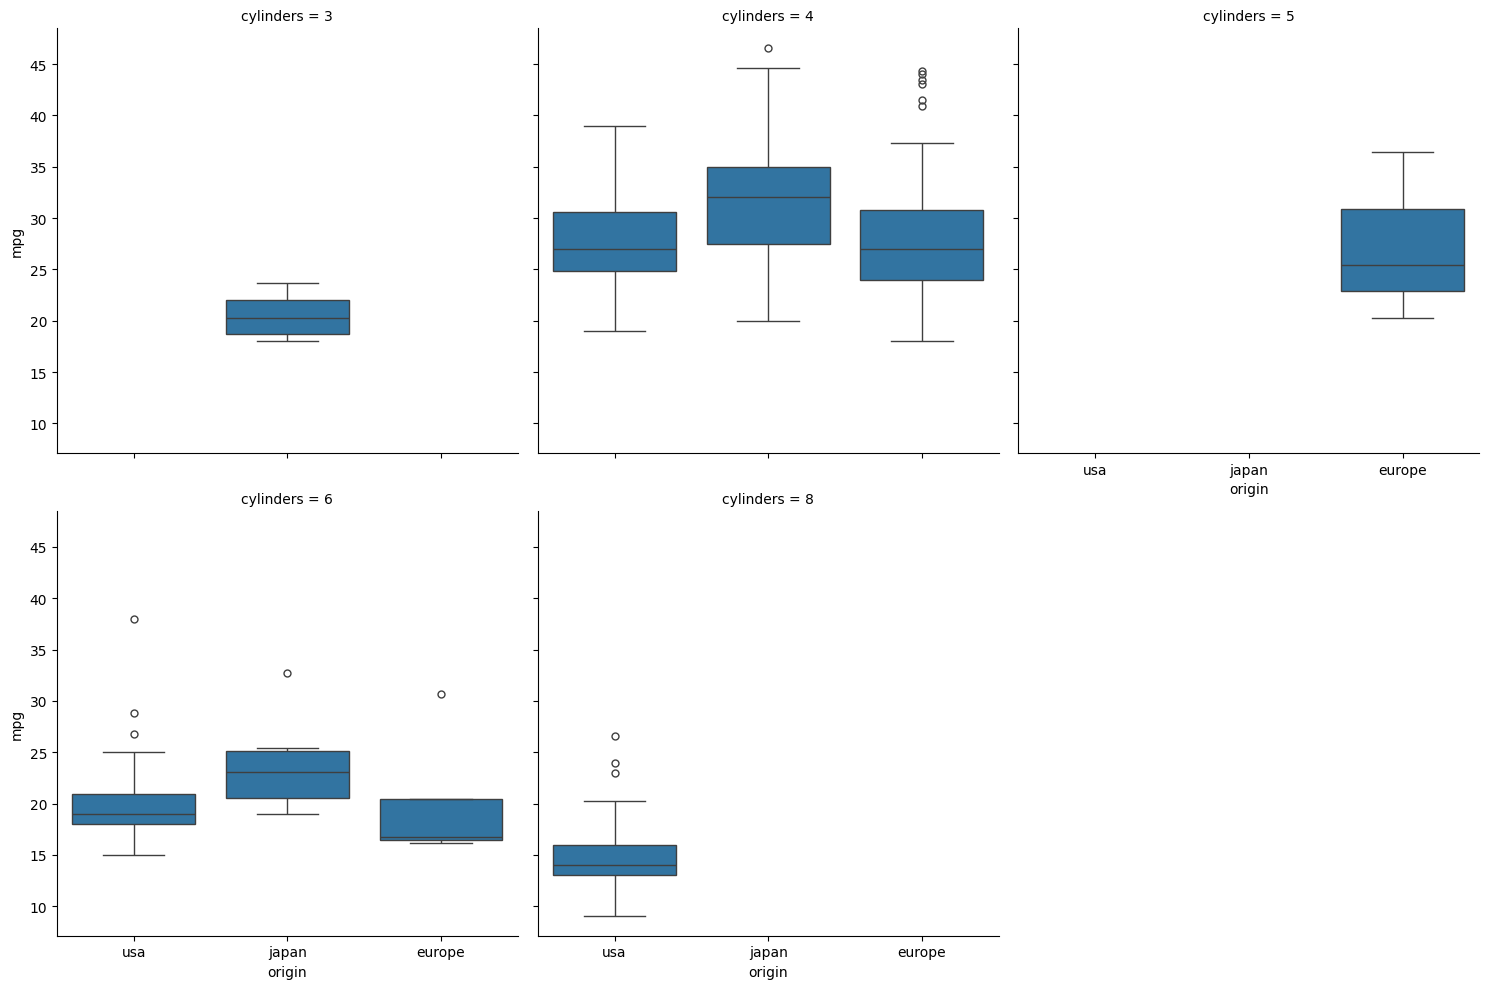

In [63]:
sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3, kind="box")

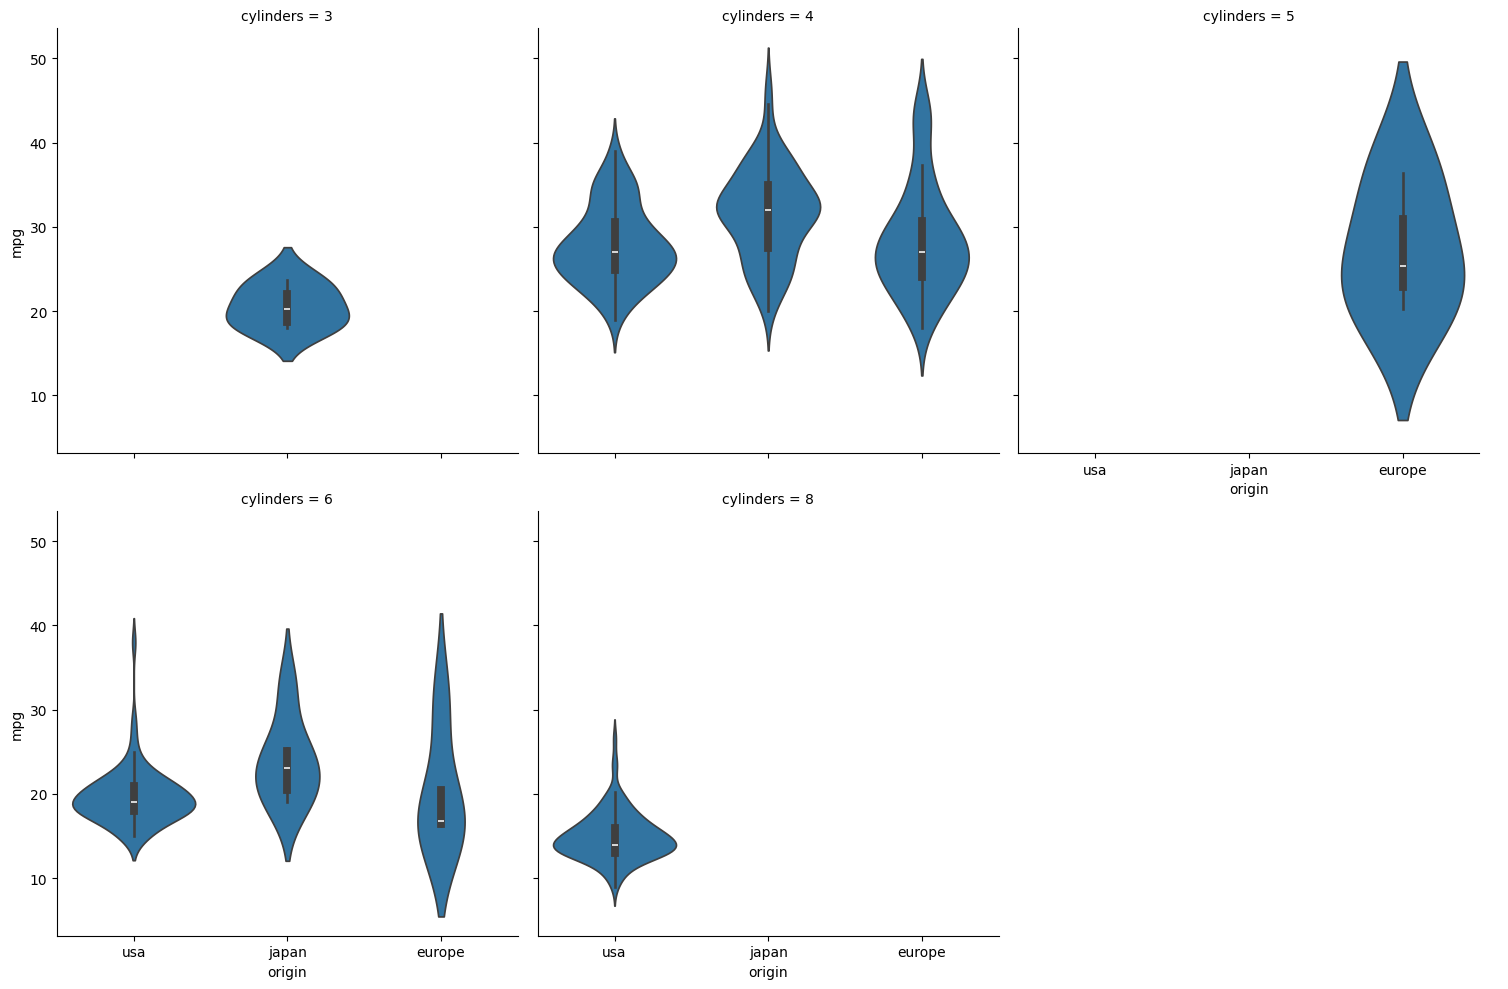

In [64]:
sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3, kind="violin")

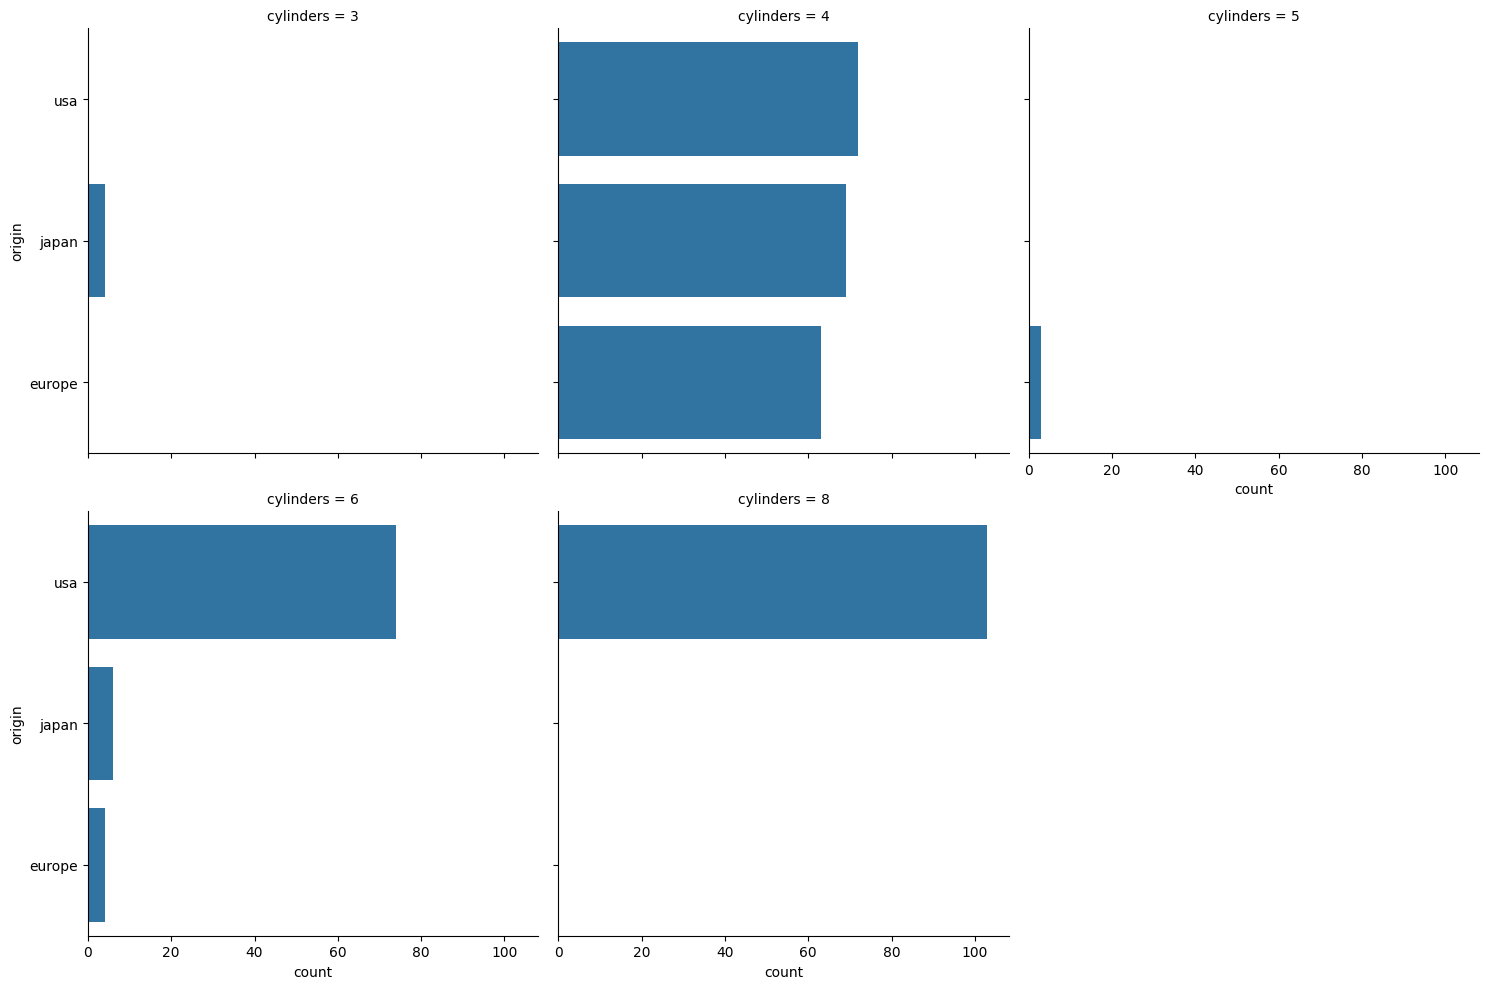

In [66]:
#catplot 으로 countplot 그리기 (x축 지정 X)
sns.catplot(data=df, y="origin", col="cylinders", col_wrap=3, kind="count")

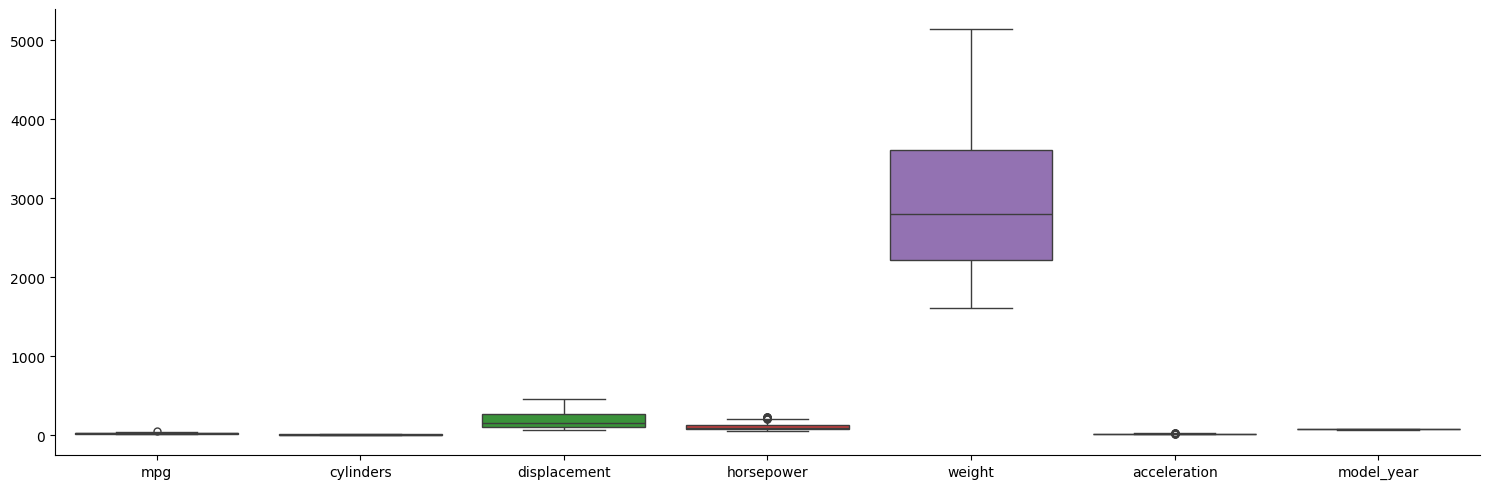

In [69]:
#catplot 으로 boxplot그리기
sns.catplot(data=df, kind="box", aspect=3)

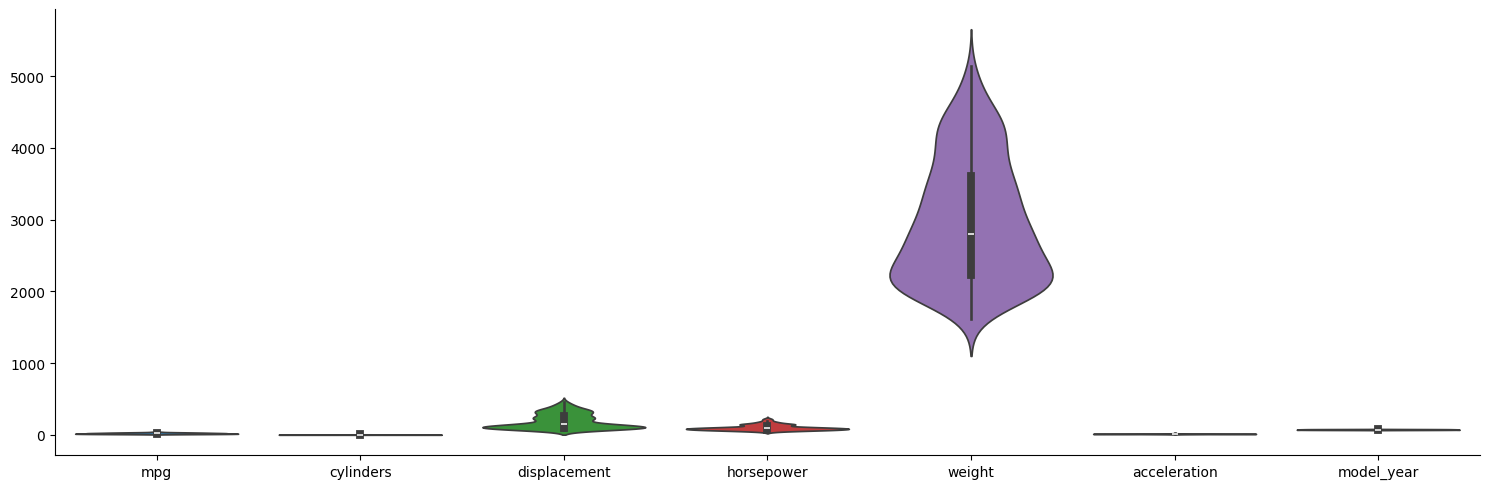

In [70]:
#catplot 으로 vionlinplot그리기
sns.catplot(data=df, kind="violin", aspect=3)